<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [33]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

<AxesSubplot:xlabel='city_type'>

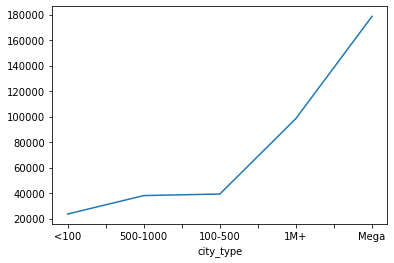

In [35]:
#1
graf_1 = df.groupby('city_type').mean()['casa_balance_0m'].sort_values()
graf_1
graf_1.plot()
#чем крупнее город проживания, тем более, в среднем, состояние счетов клиентов

<AxesSubplot:xlabel='age', ylabel='loan_balance_0m'>

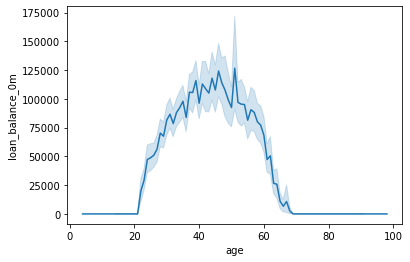

In [36]:
#2
sns.lineplot(data = df, x = 'age', y = 'loan_balance_0m')
#распределение объема всех кредитов в зависимости от возраста

<AxesSubplot:xlabel='age', ylabel='ml_balance'>

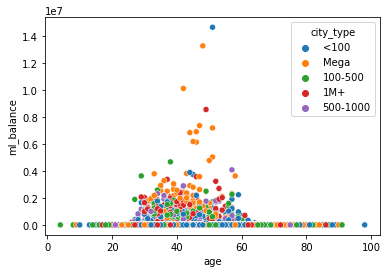

In [41]:
#3
sns.scatterplot(
    data = df,
    x = 'age',
    y = 'ml_balance',
    hue = 'city_type')
#распределение объема ипотеки в зависимости от возраста и размера города

<AxesSubplot:xlabel='city_type', ylabel='ml_balance'>

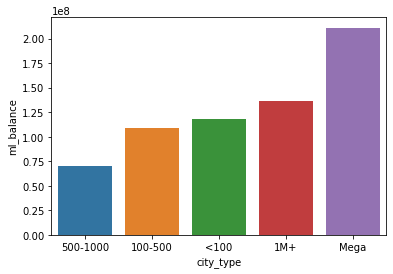

In [38]:
#4
df_ip = df.groupby('city_type').sum()['ml_balance'].sort_values().reset_index()
df_ip

sns.barplot(
    data=df_ip,
    x ='city_type',
    y='ml_balance')
#объем ипотеки в зависимости от типа города

<AxesSubplot:>

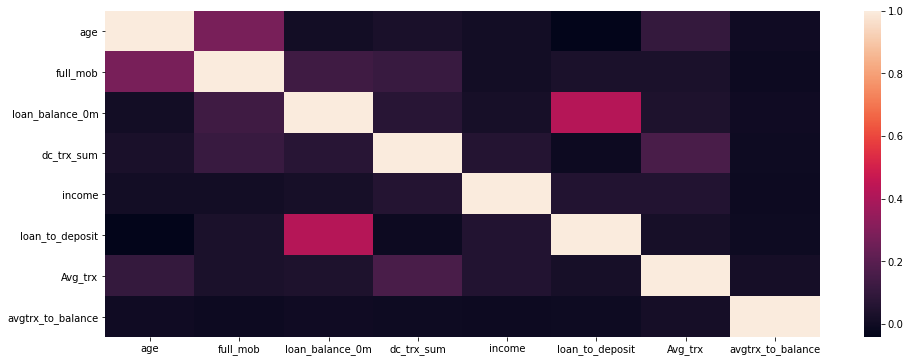

In [54]:
#5
df_p = df[['age',
           'full_mob',
           'loan_balance_0m',
           'dc_trx_sum','income',
           'loan_to_deposit'
           ,'Avg_trx',
           'avgtrx_to_balance']]

plt.figure(figsize=(16,6))
sns.heatmap(df_p.corr())
#тепловая карта корреляции данных, выбранных из основной БД, видно, что немногие данные коррелируют

<AxesSubplot:xlabel='age', ylabel='dc_trx_sum'>

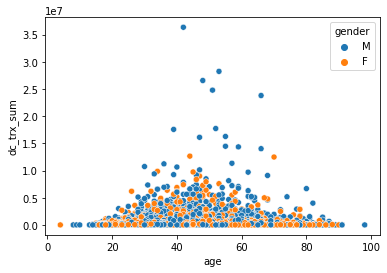

In [55]:
#6
df_n = df[df.gender.notnull()]

sns.scatterplot(
    data=df_n,
    x='age', 
    y='dc_trx_sum',
    hue='gender'
    )
#сумма трат в разрезе пола. Видно,что среди крупных трат преобладают мужчины